<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



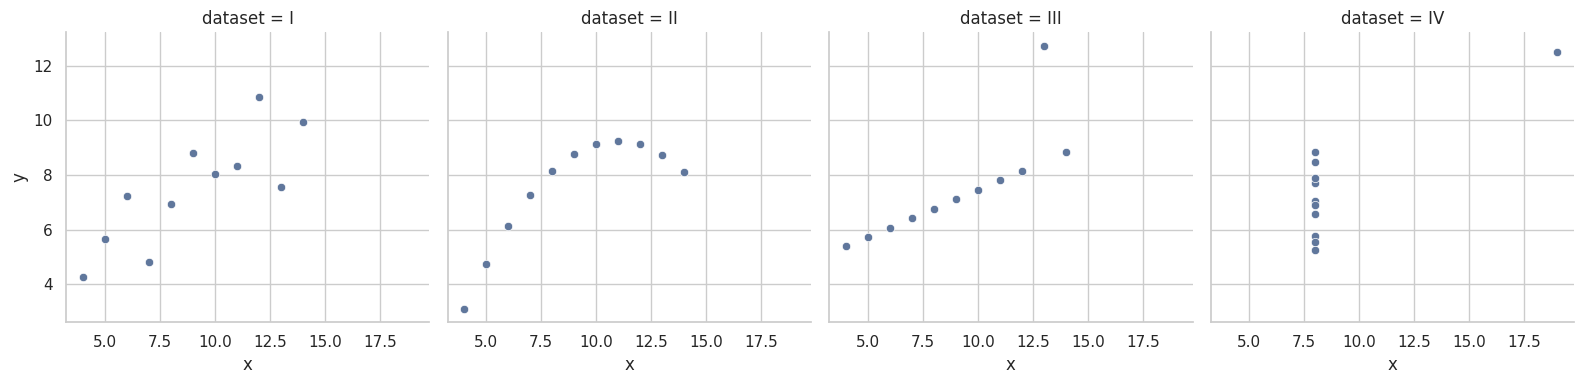

In [2]:
g = sns.FacetGrid(data, col="dataset", height=4, aspect=1)
g.map(sns.scatterplot, "x", "y")
plt.show()

Respuesta: Si se ven diferencias entre los grupos. En el primero una relación lineal, en el segundo no se ve una relación lineal, sino una parabola. En el tercero se ve una relación lineal pero con un outlier. Finalmente en cuarto la mayoria de puntos están en un valor de x con un outlier más lejano a estos.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
description = data.groupby('dataset').describe()
display(description)

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Respuesta: Para el grupo 1, x: distribuido entre 4 y 11 de manera bastante uniforme. y: valores relativamente estables, sin extremos tan marcados (mín. = 4.26, máx. = 10.84).
Esto representa un caso típico de correlación lineal “normal” donde los datos están dispersos alrededor de una recta.

Para el grupo 2, x: idéntica distribución del grupo 1. y: mucho más concentrado en valores bajos (mín. ≈ 3.10) y sin alcanzar valores tan altos como en el grupo 1. Aunque las medias y varianzas son similares, aquí los datos siguen una relación no lineal, lo cual rompe la idea de que la recta ajuste bien.

Para el grupo 3,mx: también similar, pero el máx. en y es más grande (= 12.74). La mediana (50%) en y es más baja (= 7.0), lo que sugiere asimetría: la mayoría de los datos son bajos pero uno o dos puntos tiran el promedio hacia arriba. Aquí un outlier en y influye en la media, lo que genera la ilusión de un patrón lineal cuando en realidad no es representativo.

Finalmente para el grupo 4, x: distribución muy distinta, con casi todos los valores en torno a 8 y 9, pero un valor aislado en 19. y: también muy concentrado (≈ 7–8), salvo un valor extremo en 12.5. Un outlier en x condiciona la regresión. La mayoría de los puntos son casi constantes.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Grupo: I
  MSE: 1.2512
  R²: 0.6665
--------------------


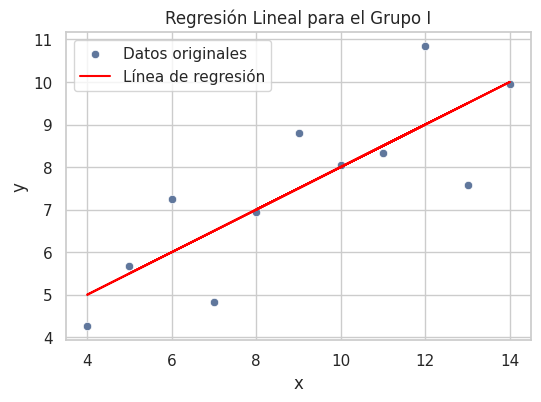

Grupo: II
  MSE: 1.2524
  R²: 0.6662
--------------------


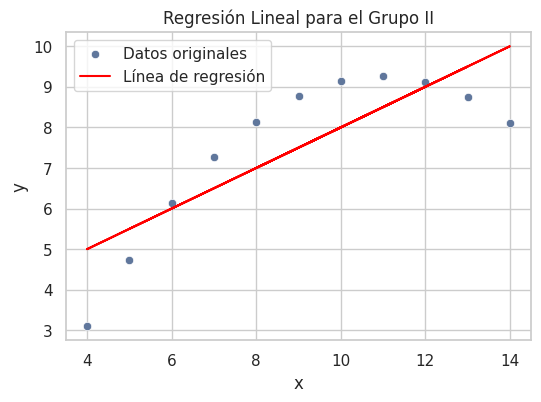

Grupo: III
  MSE: 1.2506
  R²: 0.6663
--------------------


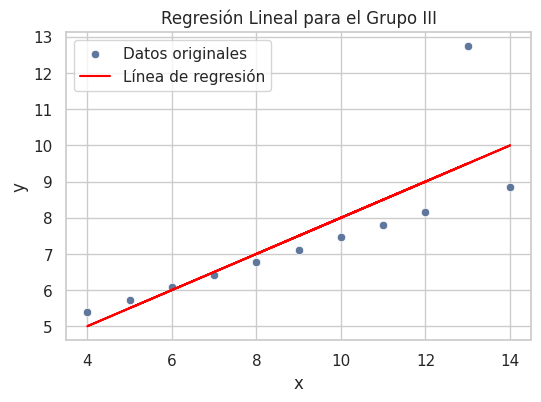

Grupo: IV
  MSE: 1.2493
  R²: 0.6667
--------------------


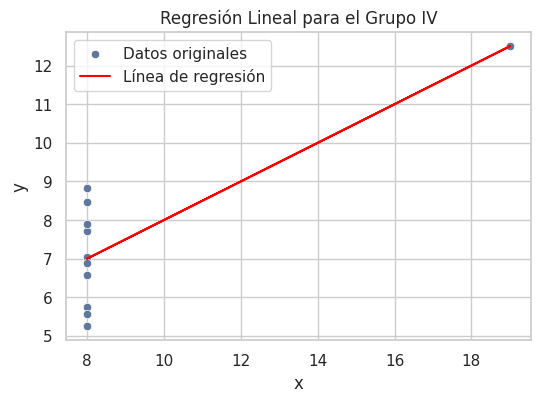

In [4]:
groups = data.groupby('dataset')
for name, group in groups:
    X = group[['x']]
    y = group['y']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Grupo: {name}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 20)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='x', y='y', data=group, label='Datos originales')
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    plt.title(f'Regresión Lineal para el Grupo {name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Respuesta: Para el grupo 1, la regresión lineal se ajusta bien a la relación lineal visible en el gráfico.

Para el grupo 2, aunque las métricas son similares al grupo 1, el gráfico muestra que la regresión lineal no captura la clara relación no lineal de los datos.
Para el grupo 3, las métricas no revelan la influencia del outlier, que en el gráfico se ve que sesga la línea de regresión lineal, haciendo que no represente fielmente la mayoría de los puntos.

Finalmente, para el grupo 4, a pesar de métricas similares, el gráfico demuestra que la línea de regresión lineal está dominada por un único outlier, y no representa la tendencia de la mayoría de los puntos con "x" constante.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Se optó por eliminar outliers del grupo 3 y 4, con tal de mejorar el ajuste del modelo de regresión lineal.

Grupo (sin outlier): III
  MSE: 0.0000
  R²: 1.0000
--------------------


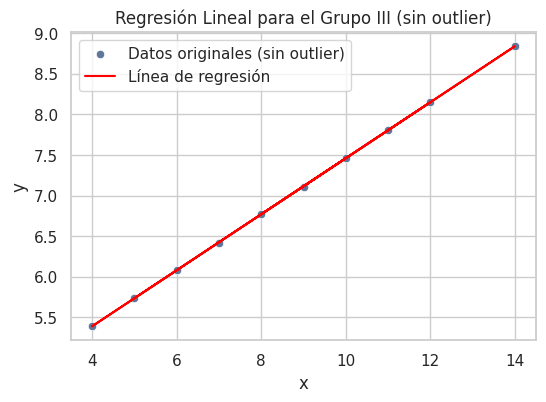

Grupo (sin outlier): IV
  MSE: 1.3742
  R²: 0.0000
--------------------


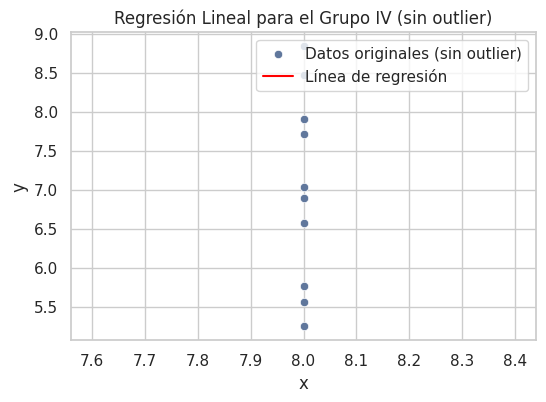

In [5]:
data_filtered = data.copy()
group_III = data_filtered[data_filtered['dataset'] == 'III']
outlier_III_index = group_III['y'].idxmax()
data_filtered = data_filtered.drop(outlier_III_index)

group_IV = data_filtered[data_filtered['dataset'] == 'IV']
outlier_IV_index = group_IV['x'].idxmax()
data_filtered = data_filtered.drop(outlier_IV_index)

filtered_groups = data_filtered[data_filtered['dataset'].isin(['III', 'IV'])].groupby('dataset')

for name, group in filtered_groups:
    X = group[['x']]
    y = group['y']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Grupo (sin outlier): {name}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 20)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='x', y='y', data=group, label='Datos originales (sin outlier)')
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    plt.title(f'Regresión Lineal para el Grupo {name} (sin outlier)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Aunque bien, para el grupo 4 no existe una mejoria con este cambio. Para el grupo 2 se necesita un modelo de regresión no lineal.